In [1]:
import matplotlib.pylab as plt
import numpy as np
from PIL import Image
import tensorflow as tf
import tensorflow_hub as hub

In [3]:
style_transfer_model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

2022-01-03 21:49:44.296671: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-03 21:49:44.298273: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [145]:
content_image = tf.io.decode_image(tf.io.read_file("../images/joshua_tree.jpeg"),
                                  channels=3,
                                  dtype=tf.float32)[tf.newaxis, ...]

In [146]:
# content_image = tf.image.resize(content_image, (480, 480), preserve_aspect_ratio=True)

In [147]:
content_image.shape

TensorShape([1, 533, 800, 3])

In [148]:
style_image = tf.io.decode_image(tf.io.read_file("../images/1024px-Vincent_van_Gogh_-_Wheat_Field_with_Cypresses_(National_Gallery_version).jpeg"),
                                 channels=3,
                                 dtype=tf.float32)[tf.newaxis, ...]
                                

In [149]:
style_image = tf.image.resize(style_image, (256, 256), preserve_aspect_ratio=True)


In [150]:
style_image.shape


TensorShape([1, 204, 256, 3])

In [151]:
output = style_transfer_model(content_image, style_image)


In [152]:
stylized_image = output[0]


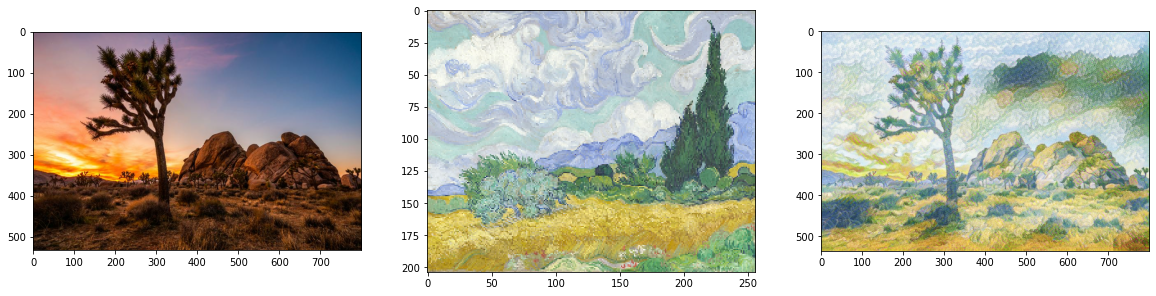

In [153]:
f, axis = plt.subplots(1, 3, figsize=(20, 20))
axis[0].imshow(content_image[0])
axis[1].imshow(style_image[0])
axis[2].imshow(stylized_image[0])

In [12]:
stylized_image

<tf.Tensor: id=11960, shape=(1, 480, 640, 3), dtype=float32, numpy=
array([[[[0.32475966, 0.5424683 , 0.79658085],
         [0.2285769 , 0.4226278 , 0.6611936 ],
         [0.5903222 , 0.78974974, 0.90207255],
         ...,
         [0.21241194, 0.40252033, 0.5866039 ],
         [0.3083472 , 0.48605904, 0.7105267 ],
         [0.19324869, 0.34837267, 0.5417361 ]],

        [[0.34375408, 0.58355045, 0.801021  ],
         [0.2553507 , 0.4470328 , 0.66509736],
         [0.49640122, 0.74133325, 0.86239004],
         ...,
         [0.27801234, 0.4564972 , 0.63537973],
         [0.36976618, 0.5291705 , 0.7415335 ],
         [0.23687857, 0.3881207 , 0.57299596]],

        [[0.33145696, 0.5338611 , 0.7634462 ],
         [0.22884223, 0.37618726, 0.60877055],
         [0.39246172, 0.6204893 , 0.793572  ],
         ...,
         [0.24982142, 0.43735892, 0.6021025 ],
         [0.33356163, 0.499582  , 0.711581  ],
         [0.20845124, 0.3565204 , 0.5316014 ]],

        ...,

        [[0.6742864 , 0.

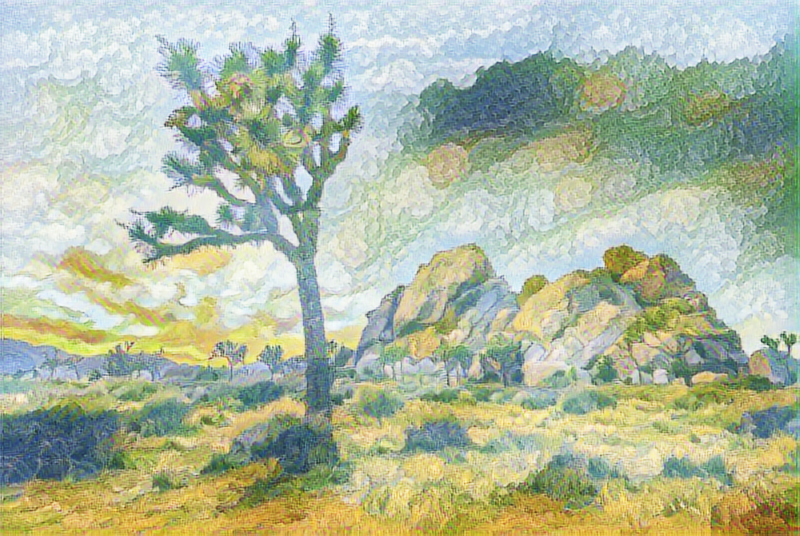

In [154]:
Image.fromarray(np.uint8(stylized_image[0] * 255))

In [14]:
stylized_image[0].dtype

tf.float32